# Double 7's Portfolio
    
    (optimize period)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from talib.abstract import *

import pinkfish as pf
import strategy

# format price data
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [2]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

In [3]:
#symbols = ['XLB', 'XLE', 'XLF', 'XLI', 'XLK', 'XLP', 'XLU', 'XLV', 'XLY']
#symbols = ['IWB', 'SPY', 'VGK', 'IEV', 'EWJ', 'EPP', 'IEF', 'SHY', 'GLD']
#symbols = ['FB', 'AMZN', 'NFLX', 'GOOG']
symbols = ['SPY', 'QQQ', 'TLT', 'GLD']
#symbols = ['SPY']

capital = 10000
start = datetime.datetime(1900, 1, 1)
#start = datetime.datetime.strptime(pf.SP500_BEGIN, '%Y-%m-%d')
end = datetime.datetime.now()
#end = datetime.datetime(2019, 1, 1)
period = 6

use_cache = True
use_regime_filter = True
use_vola_weight = True

Define Optimizations

In [4]:
# pick one
optimize_period = True

# define period
if optimize_period:
    Xs = range(3, 18+1, 1)
    Xs = [str(X) for X in Xs]

Run Strategy

In [5]:
strategies = pd.Series(dtype=object)
for X in Xs:
    print("{0}".format(X), end=" ")
    if optimize_period:
        strategies[X] = strategy.Strategy(symbols, capital, start, end, margin=3, period=int(X),
                                          use_cache=use_cache, use_regime_filter=use_regime_filter,
                                          use_vola_weight=use_vola_weight)
    strategies[X].run()
    strategies[X].rlog, strategies[X].tlog, strategies[X].dbal = strategies[X].get_logs()
    strategies[X].stats = strategies[X].get_stats()

3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 

Summarize results

In [6]:
metrics = ('annual_return_rate',
           'max_closed_out_drawdown',
           'annualized_return_over_max_drawdown',
           'best_month',
           'worst_month',
           'sharpe_ratio',
           'sortino_ratio',
           'monthly_std',
           'pct_time_in_market',
           'total_num_trades',
           'pct_profitable_trades',
           'avg_points')

df = strategy.summary(strategies, metrics)
df

,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
annual_return_rate,12.97,14.78,15.97,18.96,17.36,15.36,16.40,17.34,18.36,16.53,14.05,14.42,14.22,13.19,13.10,13.75
max_closed_out_drawdown,-22.56,-21.88,-21.65,-24.13,-24.47,-35.61,-35.54,-30.24,-30.22,-32.83,-32.83,-30.62,-30.64,-28.44,-28.37,-28.48
annualized_return_over_max_drawdown,0.57,0.68,0.74,0.79,0.71,0.43,0.46,0.57,0.61,0.50,0.43,0.47,0.46,0.46,0.46,0.48
best_month,19.17,21.81,29.29,29.78,20.93,40.34,40.36,44.54,45.76,43.37,39.38,39.45,39.77,39.95,40.05,42.37
worst_month,-22.56,-21.88,-21.65,-19.05,-15.46,-35.61,-35.54,-29.98,-29.95,-32.83,-32.83,-30.62,-30.64,-27.94,-27.87,-27.98
sharpe_ratio,0.77,0.85,0.91,1.06,0.97,0.82,0.88,0.94,1.00,0.90,0.78,0.80,0.79,0.75,0.75,0.80
sortino_ratio,0.81,0.92,1.00,1.18,1.09,0.87,0.92,1.01,1.07,0.95,0.83,0.86,0.85,0.80,0.80,0.85
monthly_std,4.04,4.06,4.06,3.85,3.91,4.38,4.38,4.33,4.30,4.27,4.27,4.32,4.31,4.17,4.12,4.04
pct_time_in_market,71.00,72.12,71.28,69.54,70.41,70.69,69.34,70.08,69.90,69.72,70.28,69.52,69.34,69.29,68.22,67.99
total_num_trades,1618.00,1128.00,869.00,716.00,597.00,521.00,455.00,404.00,360.00,321.00,292.00,274.00,257.00,233.00,218.00,205.00


Bar graphs

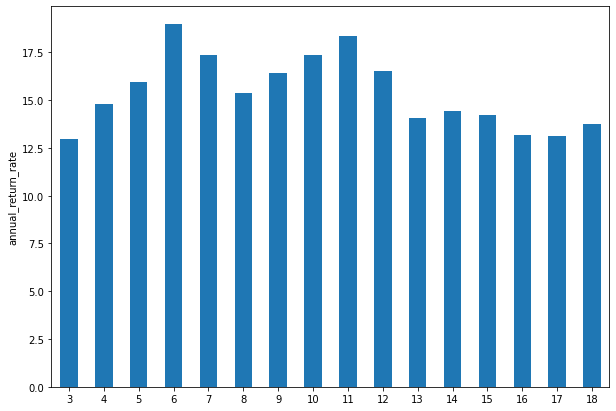

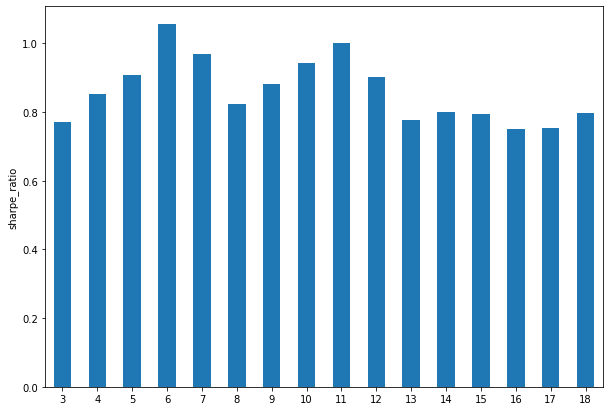

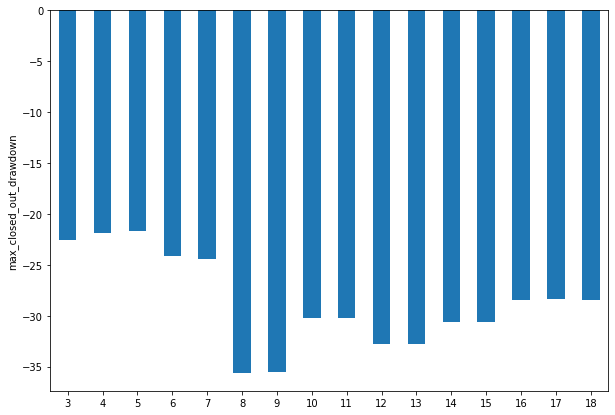

In [7]:
strategy.plot_bar_graph(df, 'annual_return_rate')
strategy.plot_bar_graph(df, 'sharpe_ratio')
strategy.plot_bar_graph(df, 'max_closed_out_drawdown')

Run Benchmark

In [9]:
s = strategies[Xs[0]]
benchmark = pf.Benchmark('SPY', capital, s.start, s.end, use_adj=True)
benchmark.run()

Equity curve

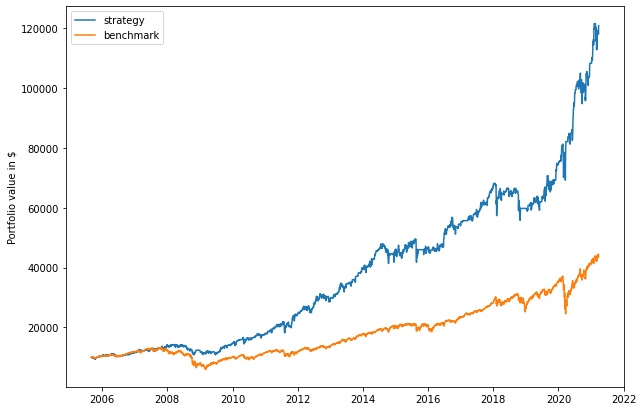

In [10]:
if optimize_period: Y = '7'

pf.plot_equity_curve(strategies[Y].dbal, benchmark=benchmark.dbal)

In [11]:
def plot_equity_curves(strategies):
    """
    Plot Equity Curve: multiple equity curves on same plot
    Arguement is daily balance.
    """
    fig = plt.figure(figsize=(16,12))
    axes = fig.add_subplot(111, ylabel='Portfolio value in $')
    for strategy in strategies:
        axes.plot(strategy.dbal['close'], label=strategy.period)

    plt.legend(loc='best')

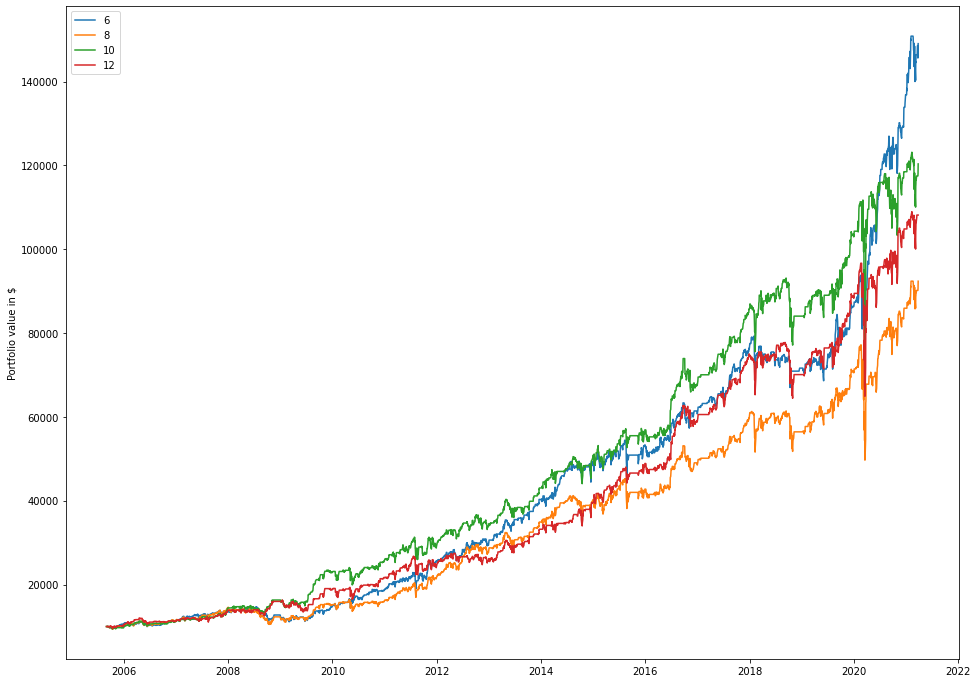

In [12]:
plot_equity_curves(strategies[3:10:2])